In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan  9 17:11:55 2024
title : Data Science In Action
@author: UTENTE
"""

# 1. **Scenario of Interest** 

Imagine you are working for a car insurance company that has shared its annual car insurance data.
As a data scientist, your task is to analyze the dataset and build a predictive model to understand
customer behaviors. The ultimate goal is to predict whether a customer is likely to claim their car
insurance (1) or not (0). This insight can help the company make informed risk assessment and
customer engagement decisions.

# 2. **Goal #1: Data Exploration and Feature Engineering**


### Start the analysis by importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.tree import export_graphviz
from IPython.display import Image
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
import graphviz

In [2]:
pd.set_option('display.max_columns', 200)


## 2.1 *Data Exploration*

#### First, we try to understand how the data set is composed

In [3]:
df = pd.read_csv("C:/Users/UTENTE/Desktop/DATA_SCIENCE_IN_ACTION/Car_Insurance_Claim.csv")
df.shape
df.head()
df.describe(include = "all").T
df.info(verbose = True)
df.dtypes
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
4602,505241,26-39,male,majority,0-9y,none,poverty,0.285000,1.0,before 2015,0.0,1.0,10238,NaN,sedan,0,0,0,1.0
3622,425719,16-25,female,majority,0-9y,none,working class,0.365539,1.0,after 2015,0.0,1.0,10238,11000.0,sedan,0,0,0,0.0
8462,158980,40-64,female,majority,0-9y,high school,upper class,0.627472,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,0,0,0,1.0
5726,461879,26-39,male,majority,10-19y,high school,middle class,0.539349,1.0,before 2015,1.0,1.0,10238,11000.0,sedan,1,0,0,0.0
1737,148284,40-64,male,majority,10-19y,university,upper class,0.605677,1.0,after 2015,1.0,1.0,10238,13000.0,sedan,1,0,2,1.0


### Checking the variables, I realised that ID column is useles for us. Let's remove it

In [4]:
data_without_id = df.drop(columns=['ID'])

In [5]:
data_without_id.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AGE,10000,4,26-39,3063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GENDER,10000,2,female,5010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RACE,10000,2,majority,9012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DRIVING_EXPERIENCE,10000,4,0-9y,3530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDUCATION,10000,3,high school,4157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INCOME,10000,4,upper class,4336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CREDIT_SCORE,9018.0,NaN,NaN,NaN,0.515813,0.137688,0.053358,0.417191,0.525033,0.618312,0.960819
VEHICLE_OWNERSHIP,10000.0,NaN,NaN,NaN,0.697,0.459578,0.0,0.0,1.0,1.0,1.0
VEHICLE_YEAR,10000,2,before 2015,6967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MARRIED,10000.0,NaN,NaN,NaN,0.4982,0.500022,0.0,0.0,0.0,1.0,1.0


### DATA VISUALIZATION

#### CHECK THE DISTRIBUTIONS

In [121]:
num_columns = data_without_id[["CREDIT_SCORE", "ANNUAL_MILEAGE", "SPEEDING_VIOLATIONS", "DUIS", "PAST_ACCIDENTS"]]

Countplots for categorical variables


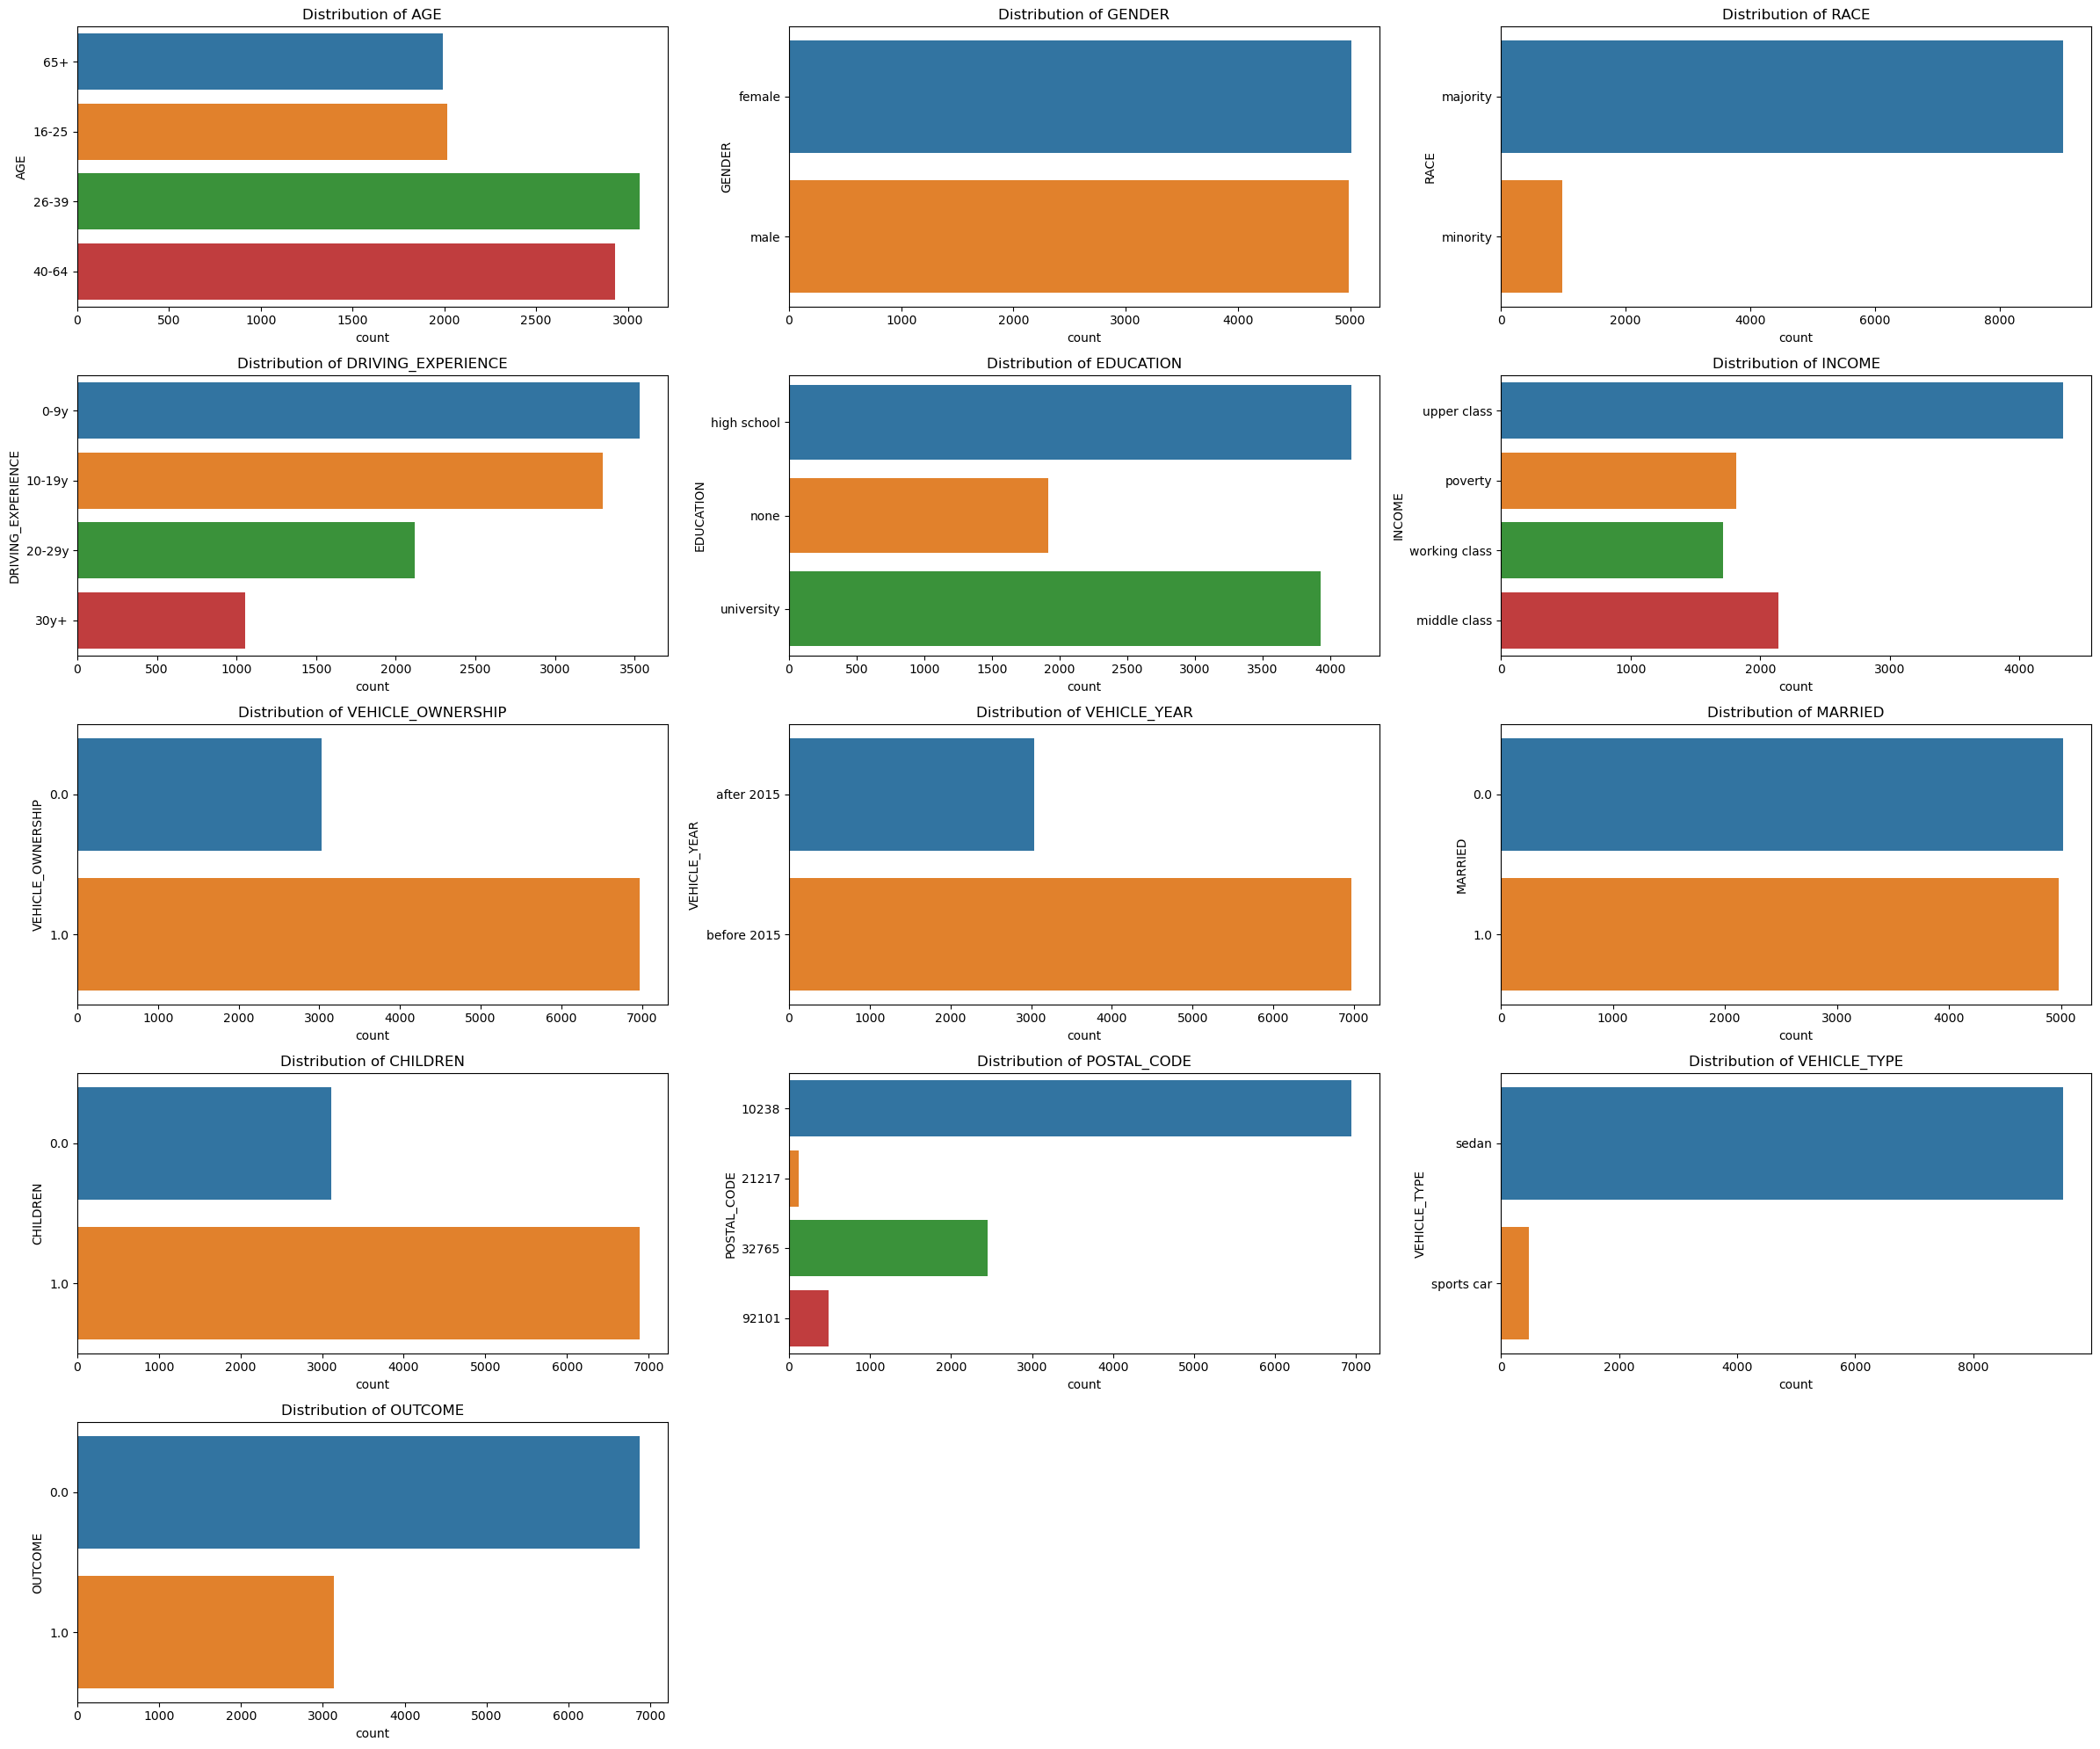

In [122]:
n_cols = 3
n_rows = 5
plt.figure(figsize=(n_cols * 8, n_rows * 4))

for i, col in enumerate ([col for col in data_without_id if col not in num_columns]):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(y=col, data=data_without_id)
    plt.title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()

Countplots related to the "OUTCOME"

In [123]:
num_columns = data_without_id[["CREDIT_SCORE", "ANNUAL_MILEAGE", "SPEEDING_VIOLATIONS", "DUIS", "PAST_ACCIDENTS"]]

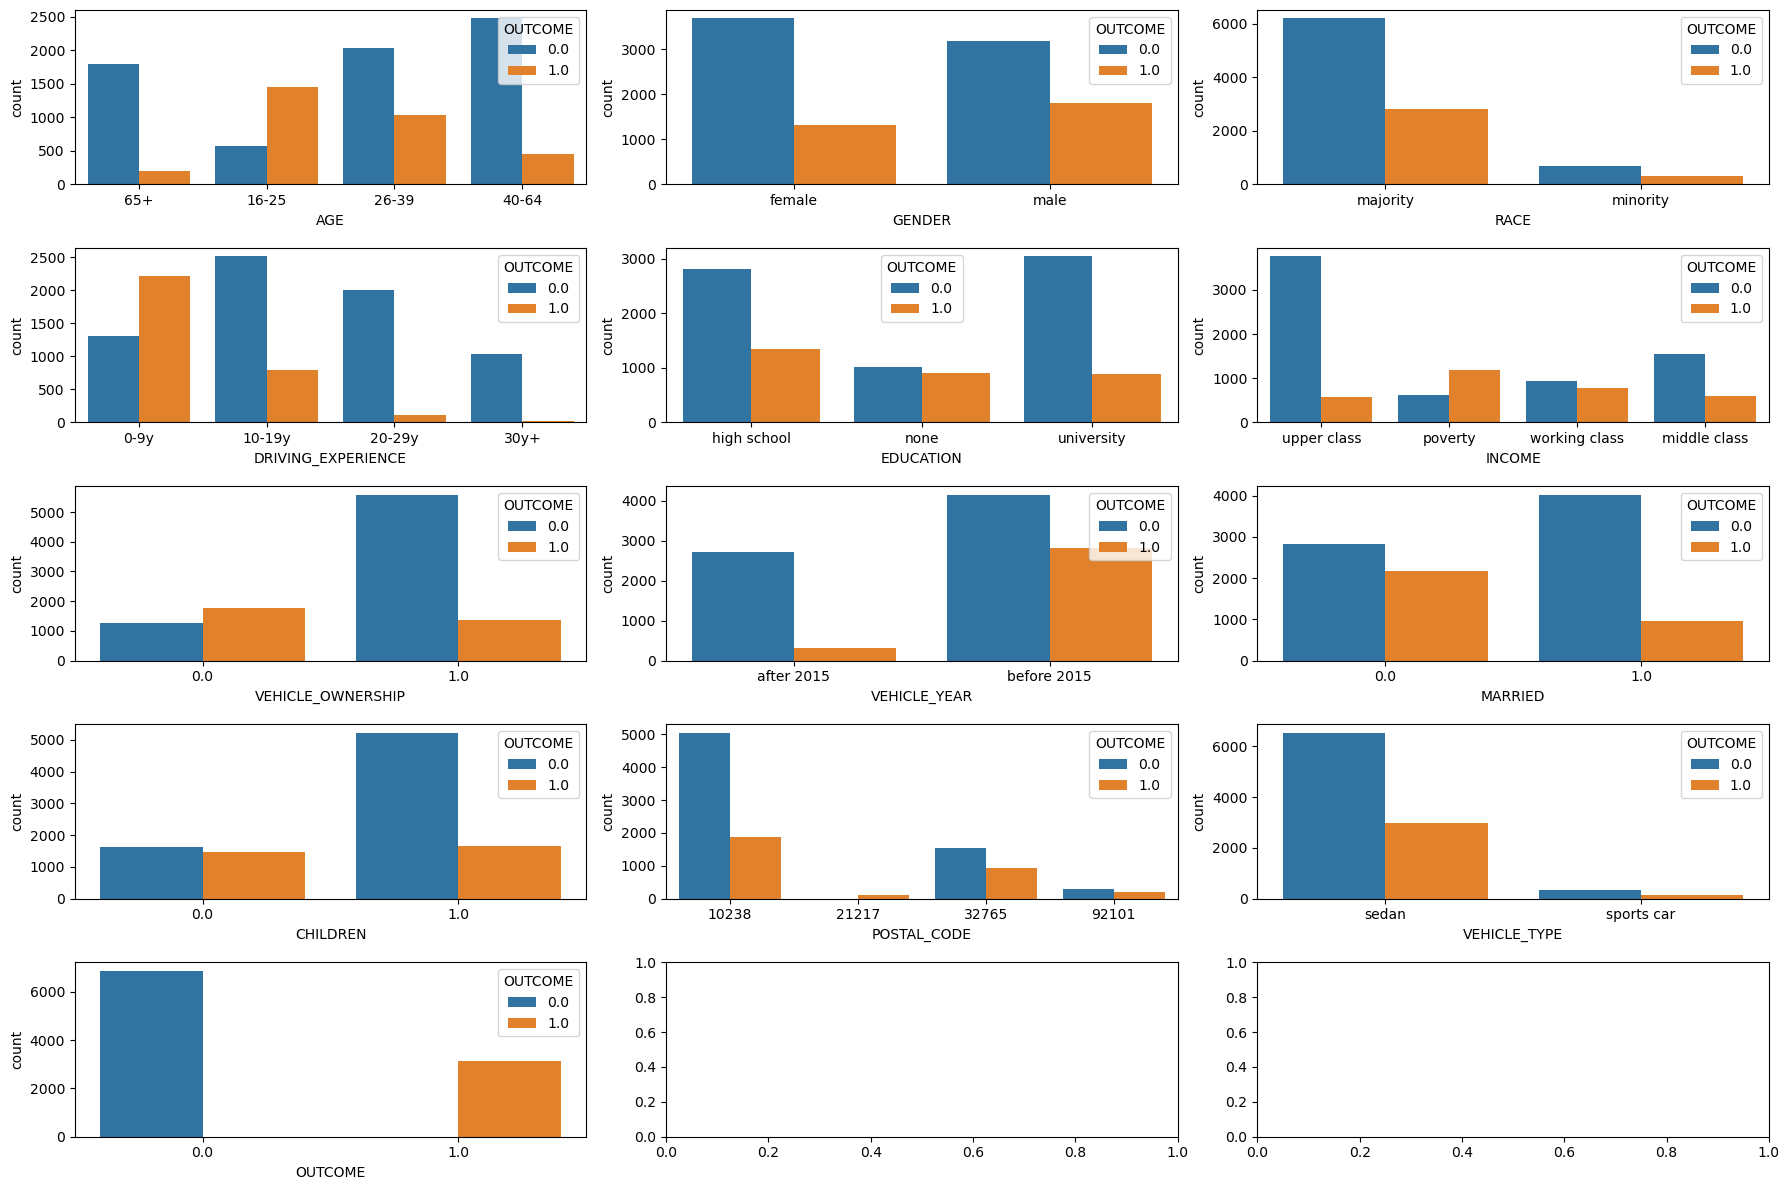

In [124]:
fig, axes = plt.subplots(5, 3, figsize= (18,12))
axes = axes.flatten()

for i, var in enumerate([col for col in data_without_id.columns if col not in num_columns]):
    row = i // 5
    col = i % 3
    sns.countplot(x = var, hue = "OUTCOME", data = data_without_id, ax = axes[i])
    
plt.tight_layout()    
plt.show()

### Useful histograms


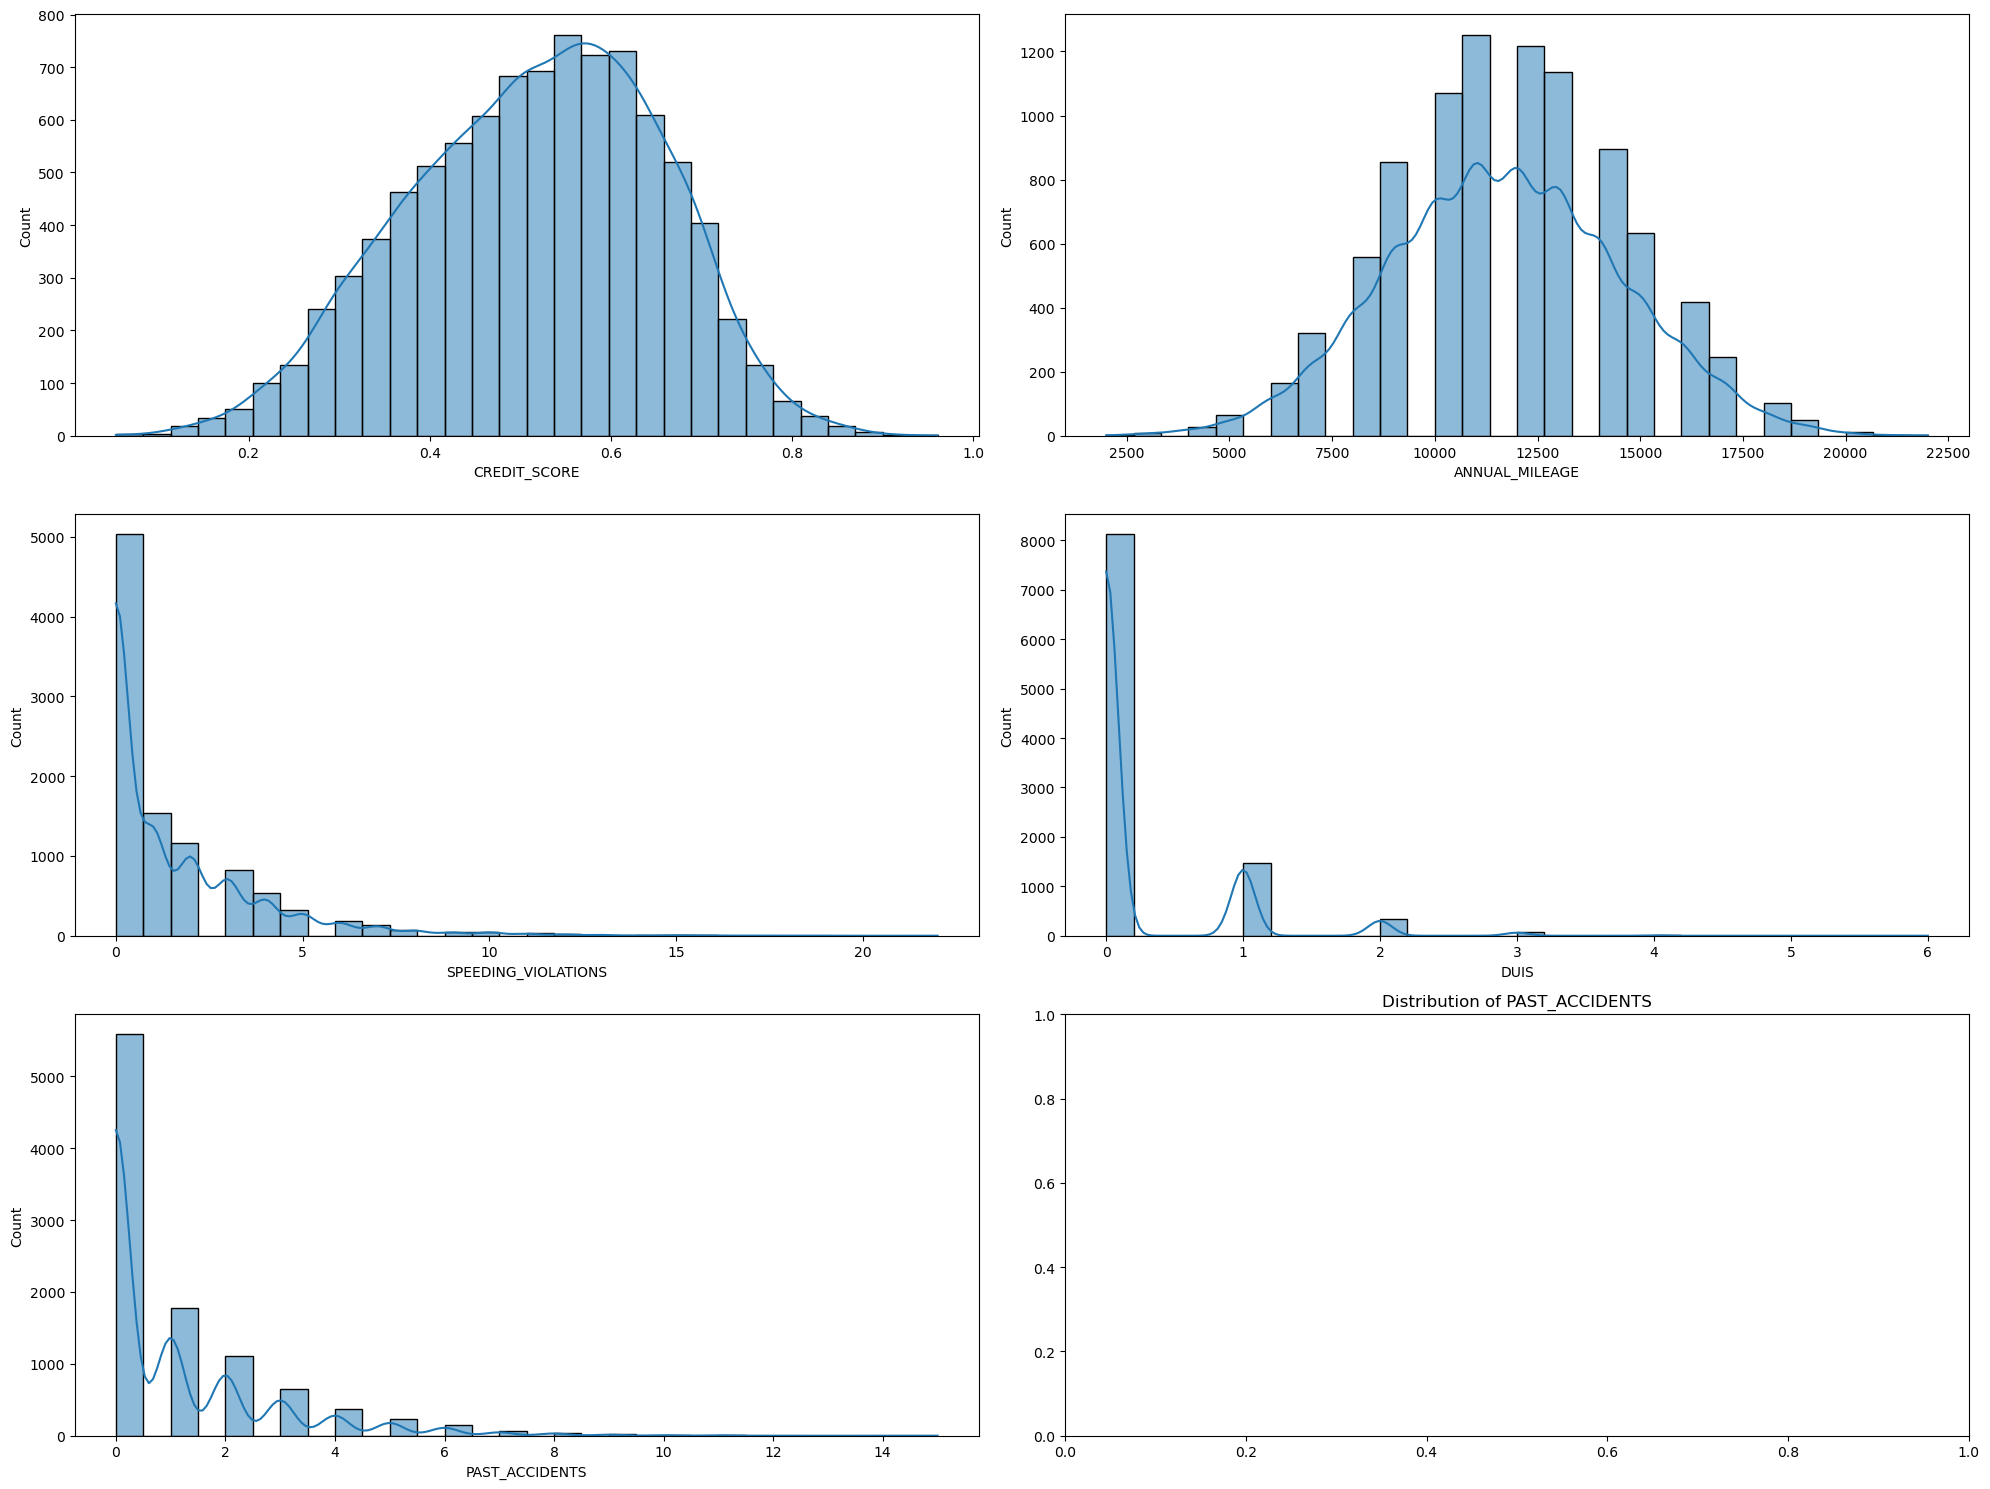

In [126]:
def plot_histograms(data_without_id):
    num_columns = data_without_id[["CREDIT_SCORE", "ANNUAL_MILEAGE", "SPEEDING_VIOLATIONS", "DUIS", "PAST_ACCIDENTS"]]
    n_rows = 3
    n_cols = 2
    fig, axs = plt.subplots(3, 2, figsize=(20, 5 * n_rows))
    axs = axs.flatten() 
    for col, ax in zip(num_columns, axs):
        sns.histplot(data_without_id[col], ax=ax, bins=30, kde=True)
        plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()
    
plot_histograms(data_without_id)

 VIOLIN PLOTS

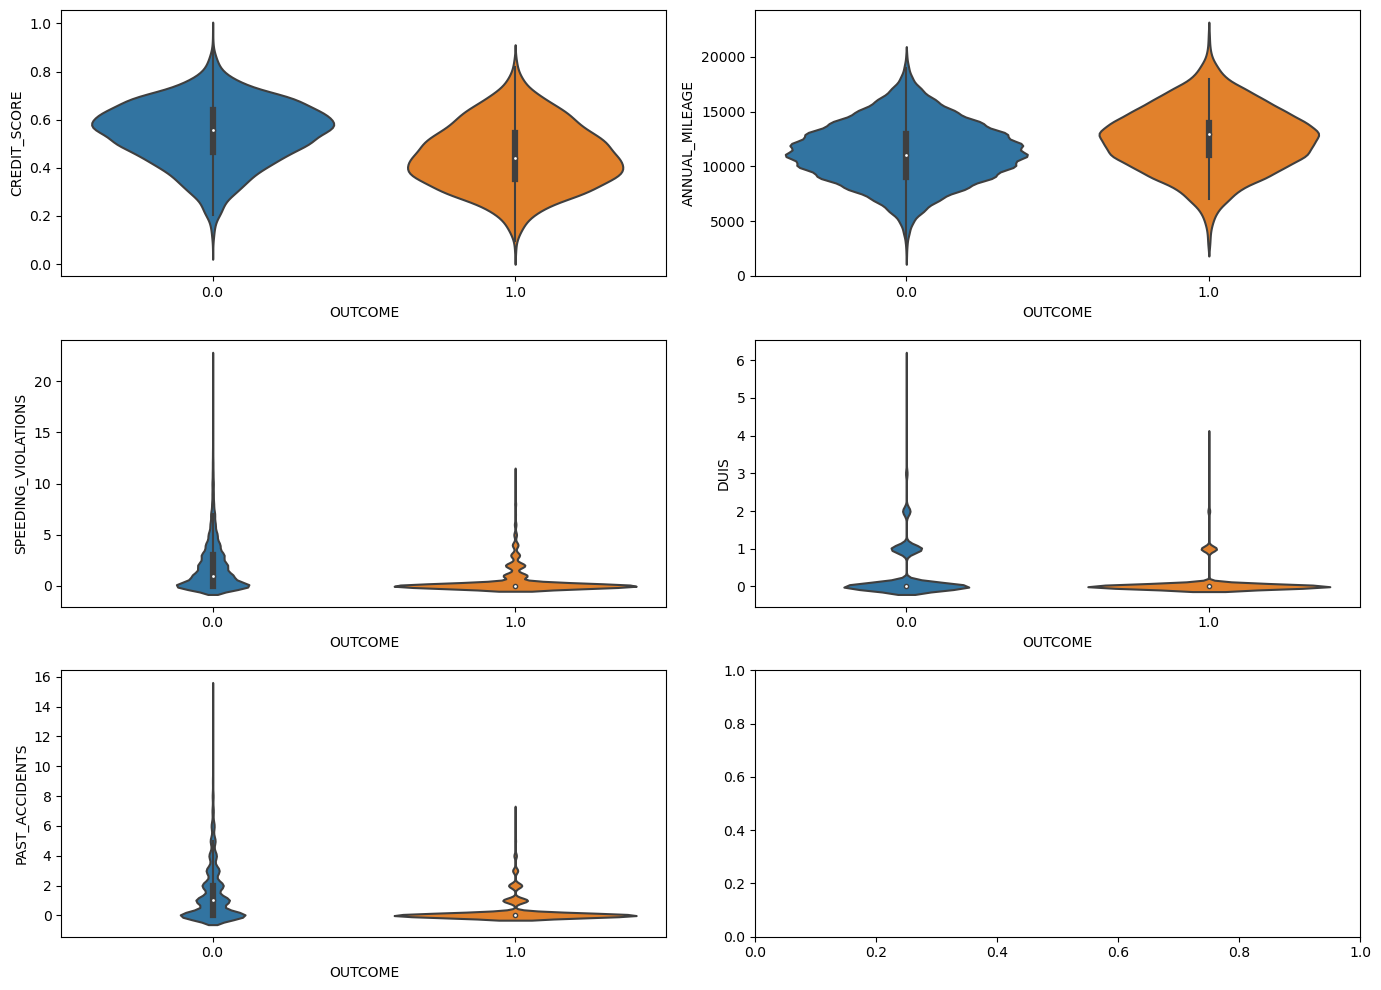

In [127]:

fig, axes = plt.subplots(3,2,figsize=(14,10))
axes = axes.flatten()
violin_plots = data_without_id[["CREDIT_SCORE", "ANNUAL_MILEAGE", "SPEEDING_VIOLATIONS", "DUIS", "PAST_ACCIDENTS"]]
for i, var in enumerate(violin_plots):
    row = i // 2  
    col = i % 2
    sns.violinplot(x="OUTCOME", y=var, data=data_without_id, ax=axes[i])
plt.tight_layout()
plt.show()

CORRELATION MATRIX

                     CREDIT_SCORE  VEHICLE_OWNERSHIP   MARRIED  CHILDREN  \
CREDIT_SCORE             1.000000           0.312037  0.281238  0.220658   
VEHICLE_OWNERSHIP        0.312037           1.000000  0.175626  0.125990   
MARRIED                  0.281238           0.175626  1.000000  0.287009   
CHILDREN                 0.220658           0.125990  0.287009  1.000000   
POSTAL_CODE              0.009040          -0.004866  0.012045  0.020911   
ANNUAL_MILEAGE          -0.174453          -0.097433 -0.462193 -0.447655   
SPEEDING_VIOLATIONS      0.204542           0.133868  0.218855  0.220415   
DUIS                     0.127366           0.086567  0.120840  0.115354   
PAST_ACCIDENTS           0.180978           0.119521  0.215269  0.206295   
OUTCOME                 -0.325286          -0.378921 -0.262104 -0.232835   

                     POSTAL_CODE  ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  \
CREDIT_SCORE            0.009040       -0.174453             0.204542   
VEHICLE_OWNERSHIP

C:\Users\UTENTE\AppData\Local\Temp\ipykernel_9260\4092929394.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


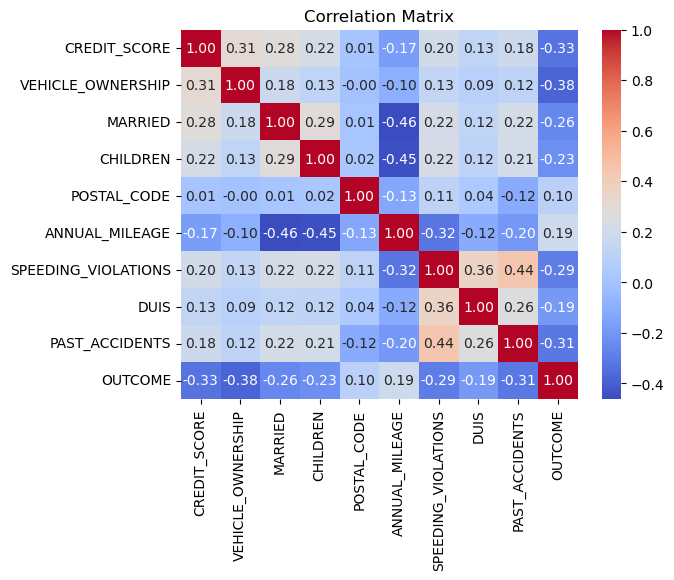

In [ ]:
fig, ax = plt.subplots()
correlation_matrix = data_without_id.corr(numeric_only=True)
print(correlation_matrix)
ax = sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
ax.set_title('Correlation Matrix')
fig.show()


### Checking missing values

In [ ]:
missing_values = data_without_id.isnull().sum()

In [ ]:
missing_values

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

### Now, let's focus on the variables with missing values.

Histplots


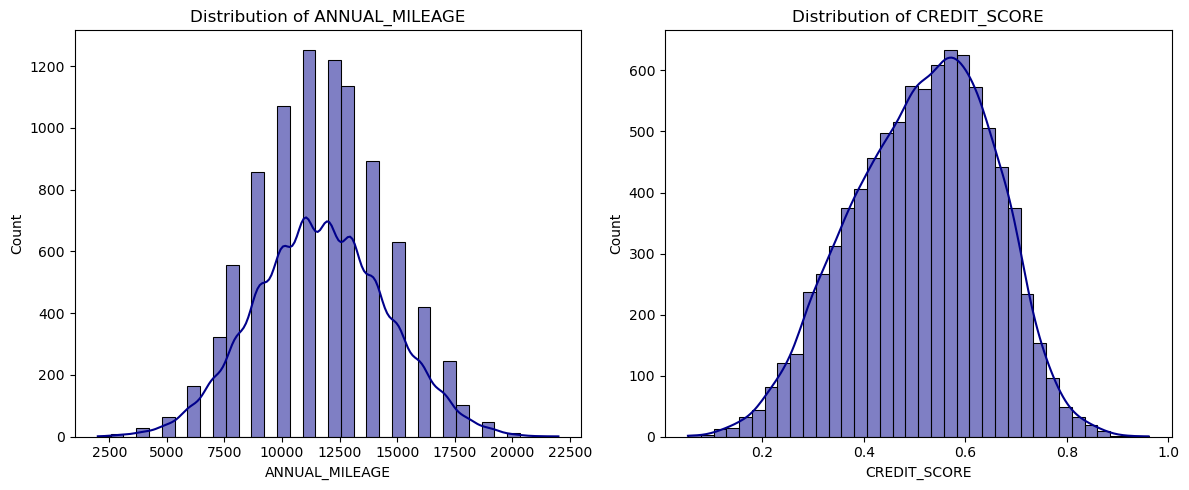

In [128]:
plt.figure(figsize=(12, 5)) 

plt.subplot(1, 2, 1)
sns.histplot(data_without_id["ANNUAL_MILEAGE"], kde=True,
             bins=int(180/5), color='darkblue', edgecolor='black')
plt.title('Distribution of ANNUAL_MILEAGE')

plt.subplot(1, 2, 2)
sns.histplot(data_without_id["CREDIT_SCORE"], kde=True,
             bins=int(180/5), color='darkblue', edgecolor='black')
plt.title('Distribution of CREDIT_SCORE')

plt.tight_layout()
plt.show()

BOXPLOTS

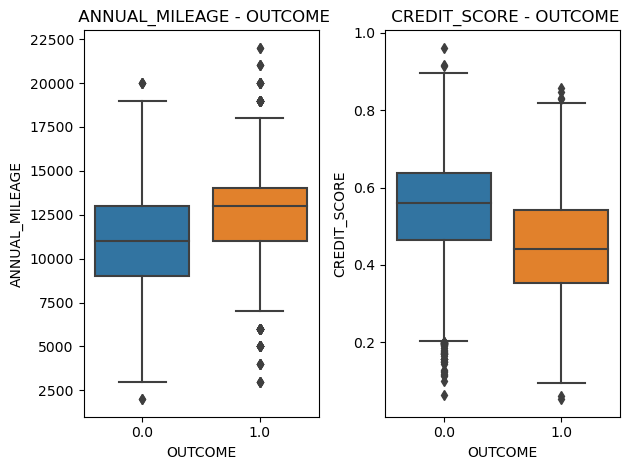

In [129]:
plt.subplot(1, 2, 1)
sns.boxplot(x='OUTCOME', y='ANNUAL_MILEAGE', data=data_without_id)
plt.title(' ANNUAL_MILEAGE - OUTCOME')

plt.subplot(1, 2, 2)
sns.boxplot(x='OUTCOME', y='CREDIT_SCORE', data=data_without_id)
plt.title(' CREDIT_SCORE - OUTCOME')

plt.tight_layout()
plt.show()
 

### Missing values heatmap


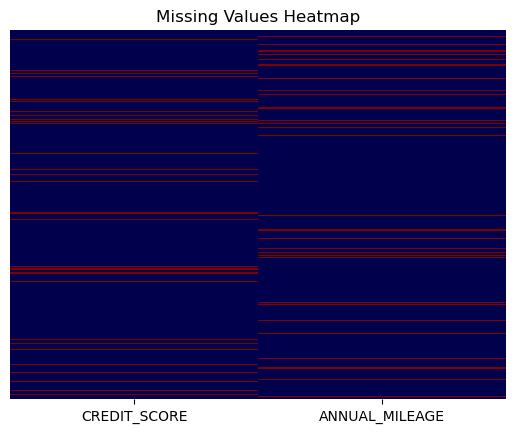

In [130]:
missing_values_heatmap = data_without_id[["CREDIT_SCORE", "ANNUAL_MILEAGE"]].isnull()
sns.heatmap(missing_values_heatmap, cmap = "seismic", cbar = False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

## 2.2 *Feature Engineering*

### To deal with missing values, I decided to adopt the **K-Nearest-Neighbors** imputation

In [131]:
missing_values_columns = data_without_id[["CREDIT_SCORE", "ANNUAL_MILEAGE"]]
knn_imputation = KNNImputer(n_neighbors=5)
df_replaced_na = knn_imputation.fit_transform(missing_values_columns)
df_replaced_na = pd.DataFrame(df_replaced_na, columns=missing_values_columns.columns)
remaining_na = df_replaced_na.isnull().sum()
print(remaining_na)

CREDIT_SCORE      0
ANNUAL_MILEAGE    0
dtype: int64


We update the dataset, with the imputed values

In [132]:
data_without_id[["CREDIT_SCORE", "ANNUAL_MILEAGE"]] = df_replaced_na
new_na = data_without_id.isnull().sum()
new_na

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

Now, let's check the distributions

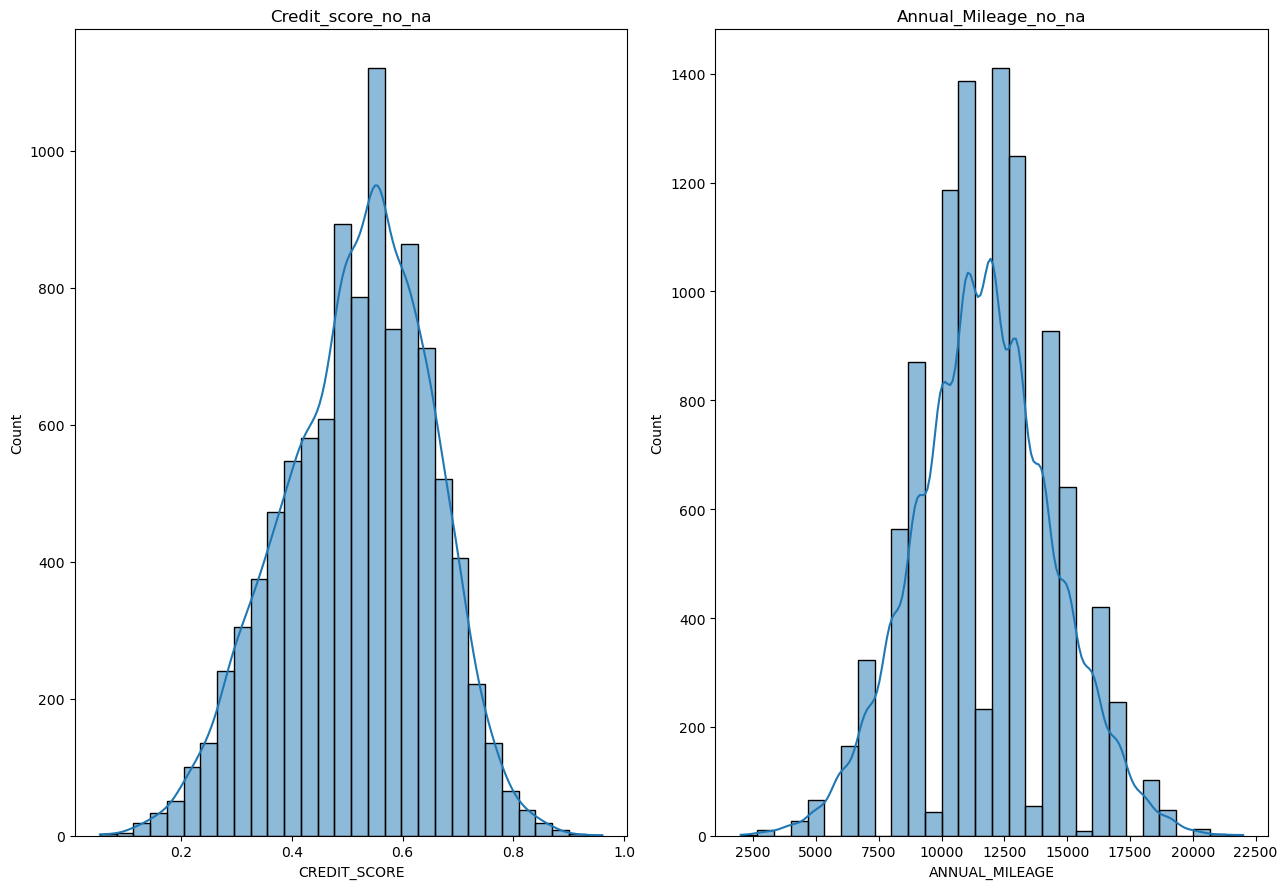

In [133]:
plt.figure(figsize=(13,9))
plt.subplot(1,2,1)
sns.histplot(data_without_id["CREDIT_SCORE"], kde = True, bins=30)
plt.title("Credit_score_no_na")

plt.subplot(1,2,2)
sns.histplot(data_without_id["ANNUAL_MILEAGE"], kde = True, bins=30)
plt.title("Annual_Mileage_no_na")

plt.tight_layout()
plt.show()

BOXPLOT

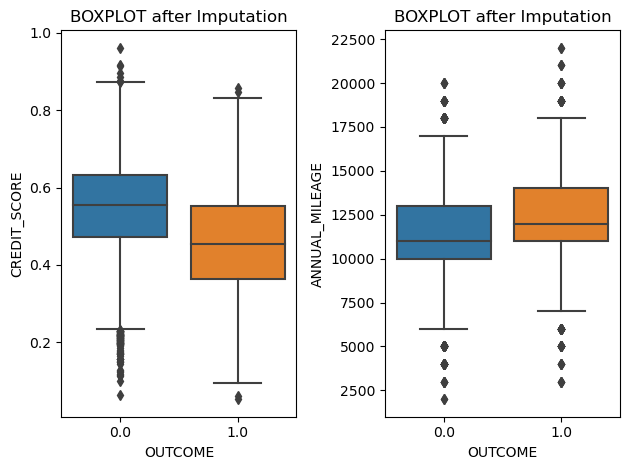

In [134]:
plt.subplot(1,2,1)
sns.boxplot(x = "OUTCOME", y = "CREDIT_SCORE",data=data_without_id)
plt.title("BOXPLOT after Imputation")

plt.subplot(1,2,2)
sns.boxplot(x="OUTCOME", y="ANNUAL_MILEAGE", data = data_without_id)
plt.title("BOXPLOT after Imputation")

plt.tight_layout()
plt.show()

### Preprocessing

Now let's prepare our dataset for the modelling

We need to label categorical variables

In [135]:
label_encoding = LabelEncoder()
columns_to_encode = ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_TYPE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'OUTCOME']

In [136]:
for columns in columns_to_encode:
    data_without_id[columns] = label_encoding.fit_transform(data_without_id[columns])
    
print(data_without_id.head())

   AGE  GENDER  RACE  DRIVING_EXPERIENCE  EDUCATION  INCOME  CREDIT_SCORE  \
0    3       0     0                   0          0       2      0.629027   
1    0       1     0                   0          1       1      0.357757   
2    0       0     0                   0          0       3      0.493146   
3    0       1     0                   0          2       3      0.206013   
4    1       1     0                   1          1       3      0.388366   

   VEHICLE_OWNERSHIP  VEHICLE_YEAR  MARRIED  CHILDREN  POSTAL_CODE  \
0                  1             0        0         1            0   
1                  0             1        0         0            0   
2                  1             1        0         0            0   
3                  1             1        0         1            2   
4                  1             1        0         0            2   

   ANNUAL_MILEAGE  VEHICLE_TYPE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  \
0         12000.0             0       

# 3. **Goal #2: Build your classification model!**


## First, we need to split our dataset

In [137]:
X = data_without_id.drop("OUTCOME", axis=1)
Y = data_without_id["OUTCOME"]
 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 15)

## 3.1 Train

### For this analysis, I decided to perform a **Random Forest Classification** model

In [138]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

Now let's check on test set

In [139]:
Y_pred = random_forest.predict(X_test)

## 3.2 Model Evaluation

In [140]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)


In [141]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.8408
Precision: 0.7378378378378379
Recall: 0.728


Perform a Confusion Matrix, to check the "goodness" of the predictions we have made

In [142]:
cm = confusion_matrix(Y_test, Y_pred)

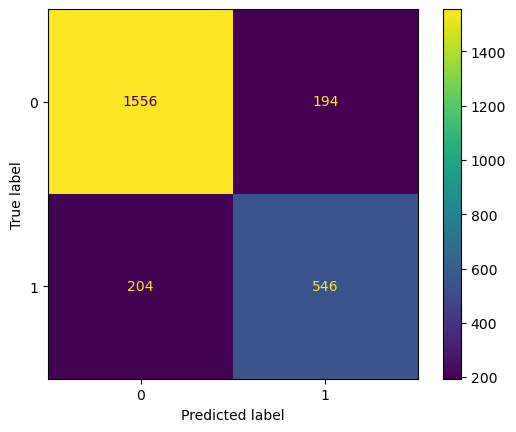

In [143]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

Visualize the results of the Random Forest

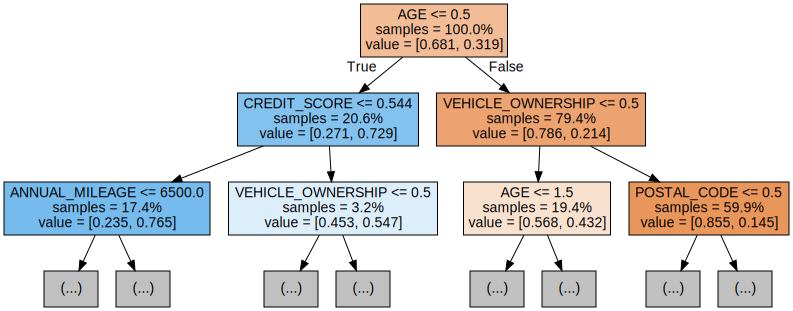

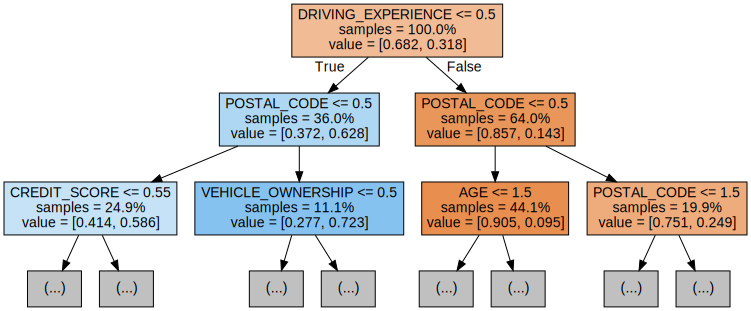

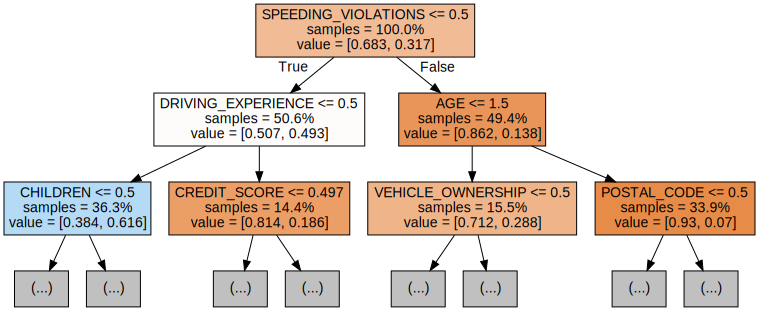

In [144]:
for i in range(3):
    tree = random_forest.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

### Best ways to split data with decision tree (which are the most importan variables?)

In [145]:
feature_importances = pd.Series(random_forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)

Plot a simple bar chart

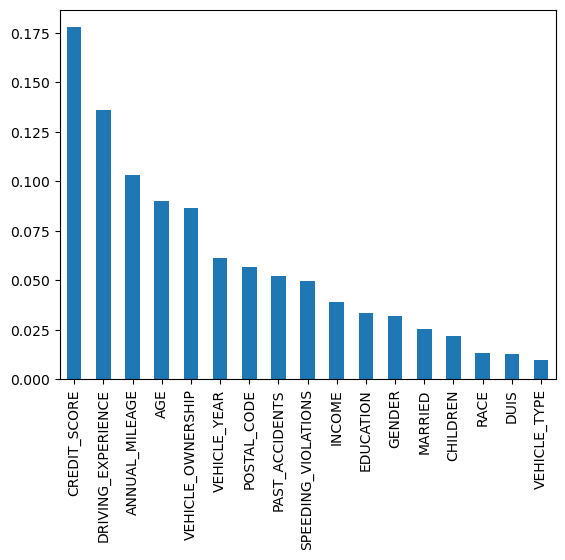

In [146]:
feature_importances.plot.bar();

Perform a ROC CURVE

In [147]:
Y_probs = random_forest.predict_proba(X_test)[:, 1]

Calculate the ROC curve

In [148]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs)

Calculate the AUC score

In [149]:
roc_auc = roc_auc_score(Y_test, Y_probs)

Plot the ROC curve

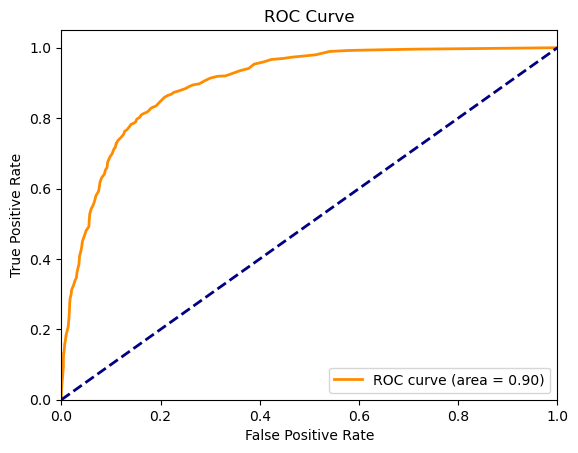

In [150]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## 3.3 Fine-tuning

In our specific case we can work on the number of decision trees in the forest
or with the max depth of each decision tree

In [151]:
param_dist = {"n_estimators": randint(50,500),
              "max_depth": randint(1,20)}

In [152]:
rf = RandomForestClassifier(random_state=35)

Random search to find the best hyperparameters

In [153]:
rand_search = RandomizedSearchCV(rf, param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

Fit the random search object to the data

In [154]:
rand_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=35),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002A0EEA5A790>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002A0F0013F10>})

In [155]:
best_rf = rand_search.best_estimator_

Print the best hyperparameters

In [156]:
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 9, 'n_estimators': 184}


In [157]:
Y_pred = best_rf.predict(X_test)

Now, compare the results

In [158]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)


In [159]:
print("Accuracy Best_rf:", accuracy)
print("Precision Best_rf:", precision)
print("Recall Best_rf:", recall)


Accuracy Best_rf: 0.8448
Precision Best_rf: 0.7369109947643979
Recall Best_rf: 0.7506666666666667


In [160]:
cm = confusion_matrix(Y_test, Y_pred)

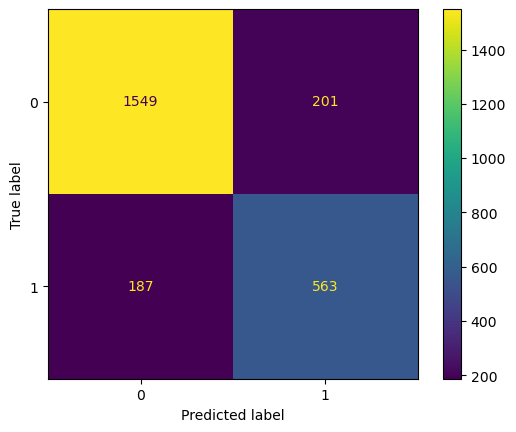

In [161]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Then plot again the random forest decision trees

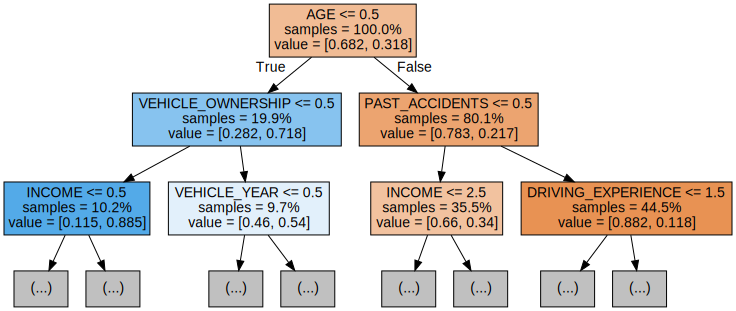

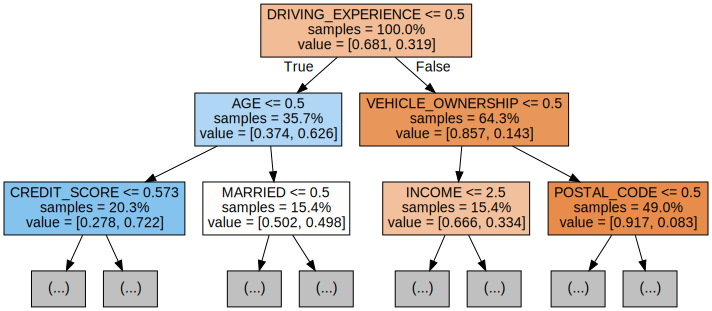

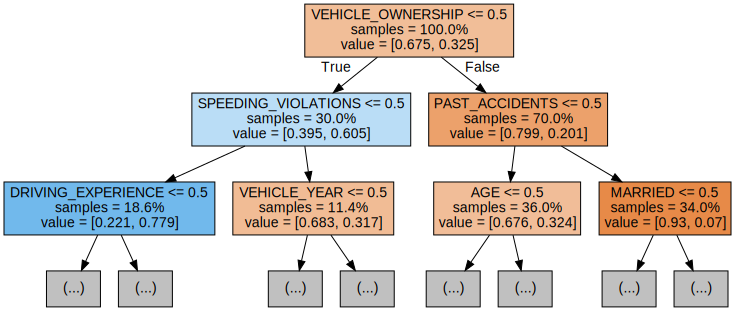

In [162]:
for i in range(3):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

### Best ways to split data with decision tree (which variable contributes most to the accuracy of the model across all the trees)

In [163]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

Plot a simple bar chart

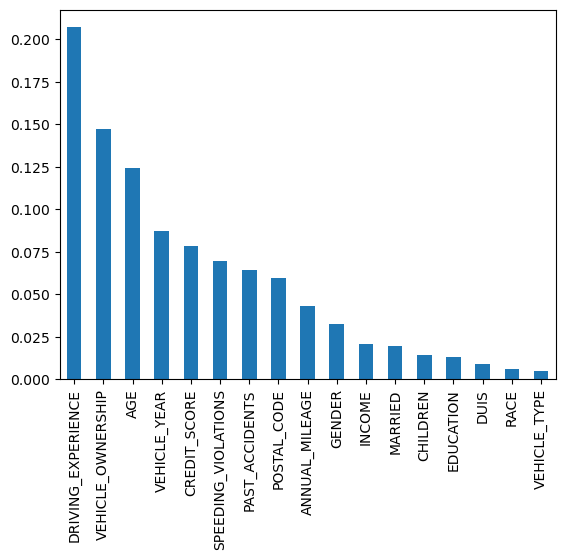

In [164]:
feature_importances.plot.bar();

Perform a ROC CURVE

In [165]:
Y_probs = best_rf.predict_proba(X_test)[:, 1]

Calculate the ROC curve

In [166]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs)

Calculate the AUC score

In [167]:
roc_auc = roc_auc_score(Y_test, Y_probs)

Plot the ROC curve

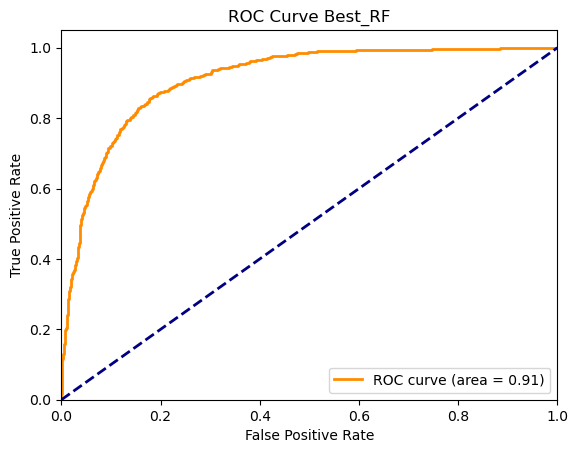

In [168]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Best_RF')
plt.legend(loc="lower right")
plt.show()

 With hyperparameter tuning we obtain a slight better result

# 4 Goal #3: Summarize your findings


In my analysis, the main issue I faced was how to handle missing values. I first tried imputing them using the median and mean, but realized this wasn't the best approach after looking at the distribution of the variables. For the outliers in "ANNUAL_MILEAGE" and "CREDIT_SCORE," I decided to keep them since they seemed to be real data points, not just random errors. Choosing the right type of plot for each variable was crucial. I also removed the "ID" variable as it wasn't useful and retained the "Postal Code" after finding out its relevance in different cities for insurance claims (10238 - New York, 21217 - Baltimore, 32765 - Oviedo (Florida), 92101 - San Diego).

For improvements, I think the data visualization can be enhanced with more complex and interactive plots. In the modeling phase, trying different types of models, including simpler ones, might be beneficial. Although hyperparameter tuning only brought minor improvements (*Accuracy: 0.8408 vs Accuracy Best_rf: 0.8448*), setting up a system for ongoing monitoring and updating of the model with new data would significantly boost its performance.
